# <p align="center"> COSC 3337 Lab 05 Minh Nguyen </p>
## <p align="center"> *Logistic Regression* </p>

## Exploratory Data Analysis

Import libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Read the csv file and preview the table

In [30]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Get a better idea of data

In [31]:
titanic_data.shape

(891, 12)

In [32]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualize Data using `barplot`

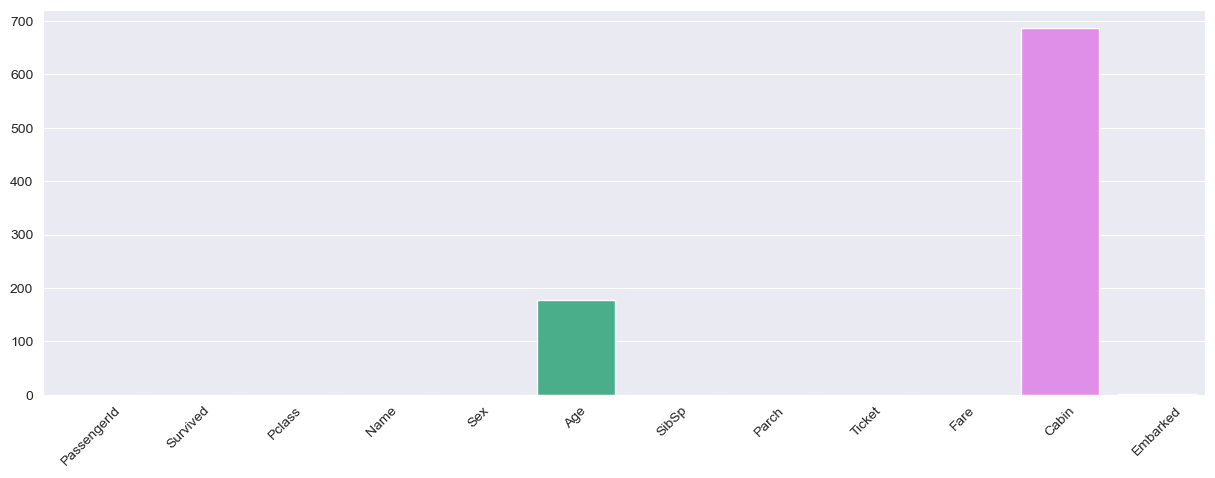

In [34]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

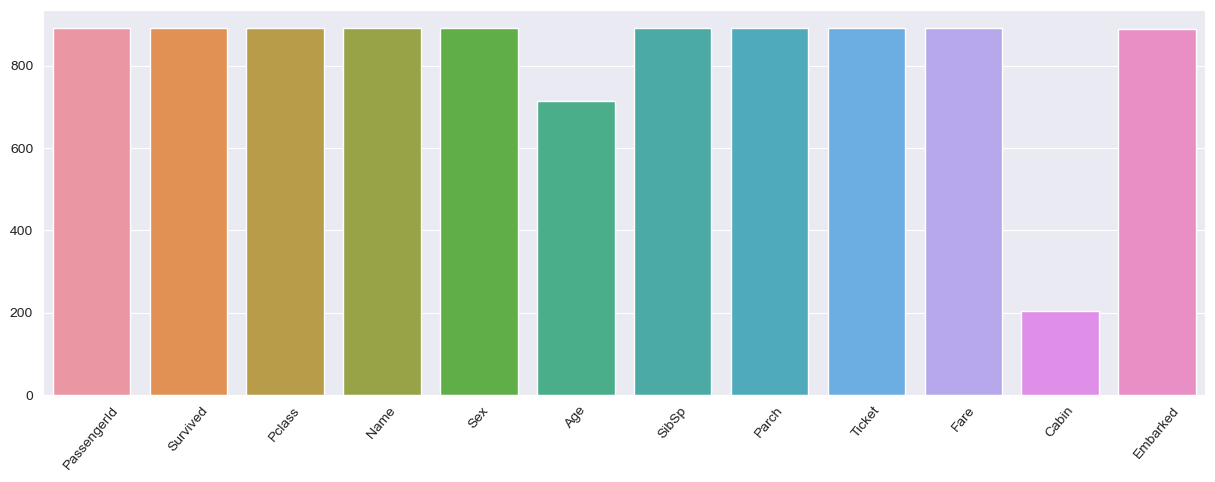

In [35]:
sns.barplot(x=titanic_data.columns, y=titanic_data.notnull().sum().values)
plt.xticks(rotation=50)
plt.show()

Check `null` and `non-null` values

In [36]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
titanic_data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


Check numbers of non-null and null values

In [38]:
titanic_data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [44]:
titanic_data.notnull().sum().values

array([891, 891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889])

In [42]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2])

Verify null and non-null total should be equal to number of rows in table

In [40]:
# Example: Column Age
print(titanic_data['Age'].isnull().sum() + titanic_data['Age'].notnull().sum())

891


Using `countplot` to see how many records of each unique value

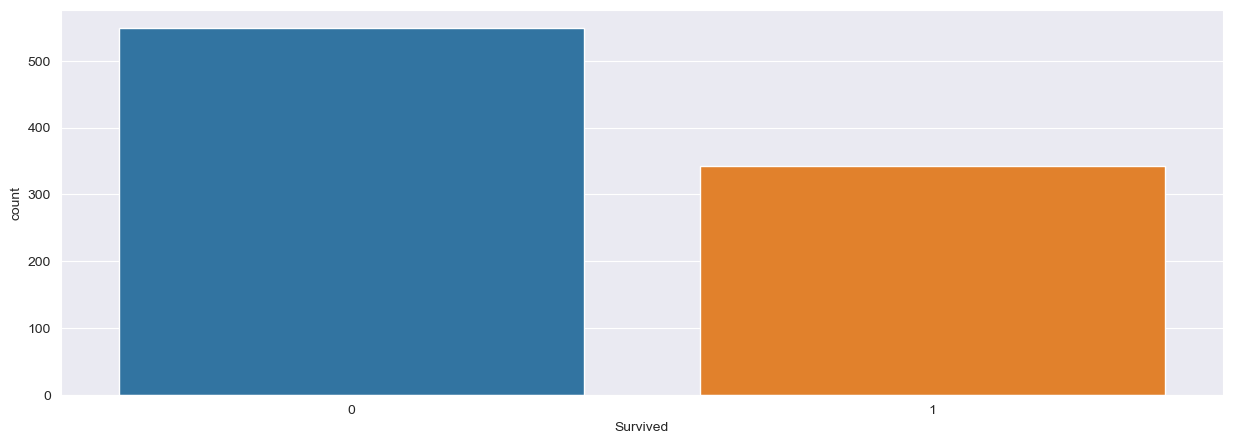

In [45]:
sns.countplot(x=titanic_data['Survived'])
plt.show()

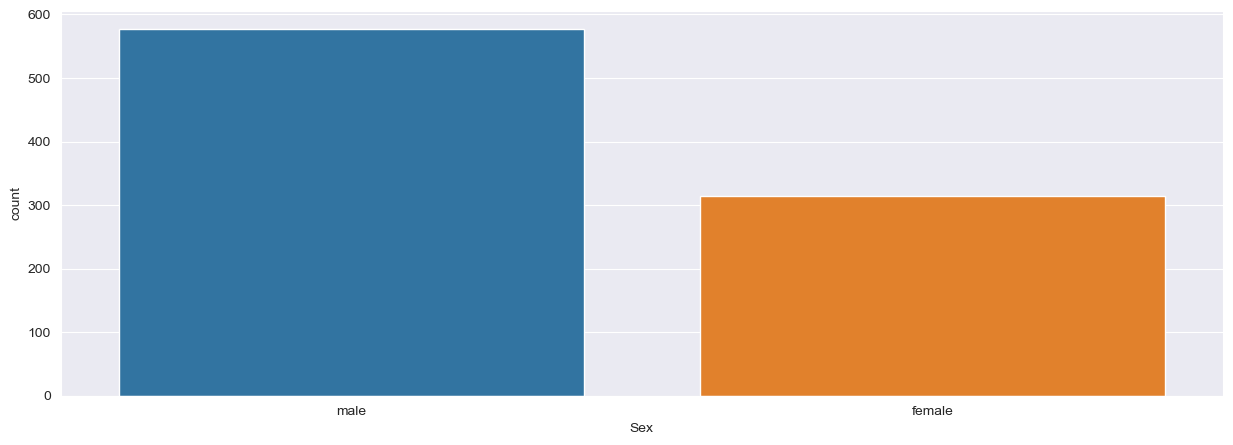

In [47]:
sns.countplot(x=titanic_data['Sex'])
plt.show()
# We can see that the number of males on Titanic were about 2 times the number of females

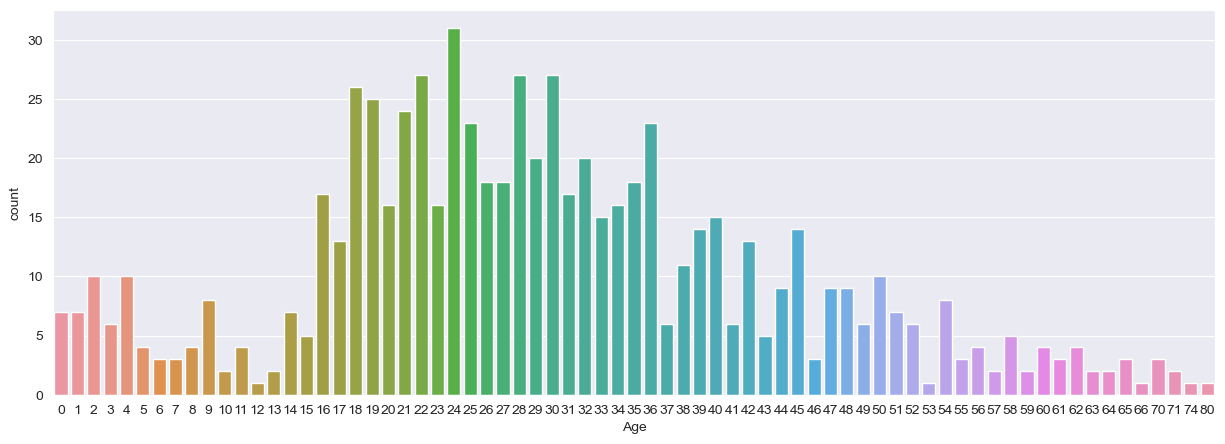

In [59]:
sns.countplot(x=titanic_data['Age'].dropna().astype(int))
plt.show()
# We cann see the majority of people on Titanic was at around the age of 20s to 30s.
# But the number of children and old people is a lot too.

More info on each `countplot` using `hue` parameter

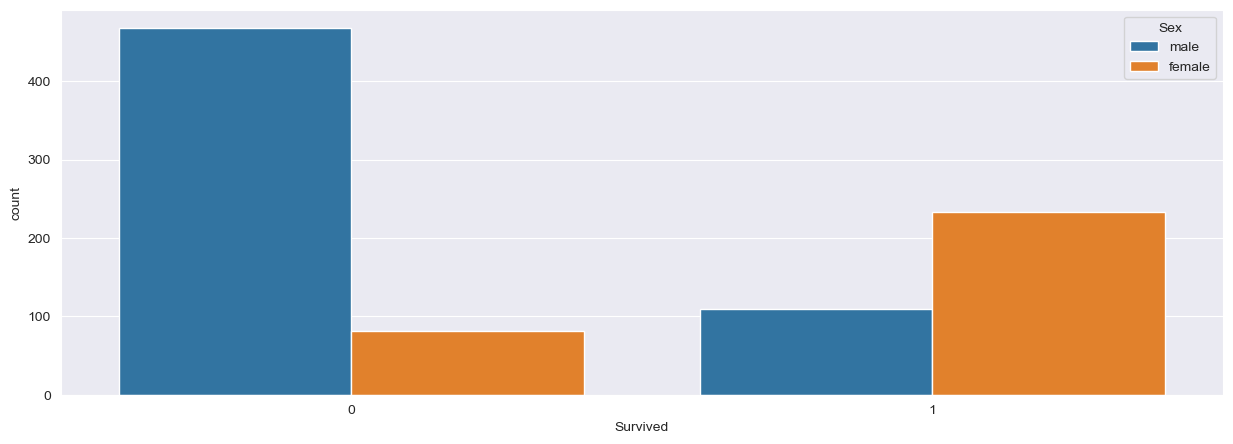

In [60]:
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

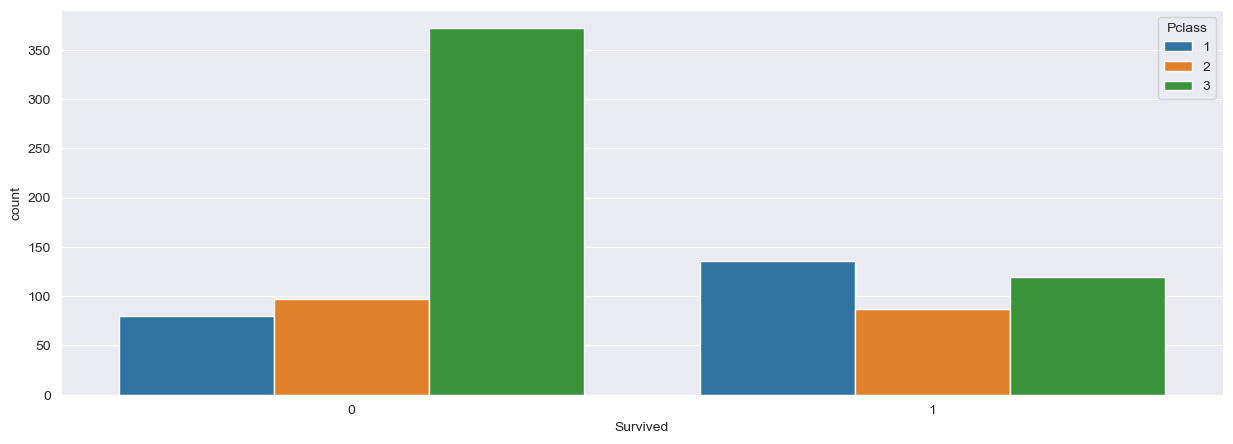

In [62]:
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()
# Majority of those who didn't survived were lowest class people
# Highest class people had the highest rate of survival

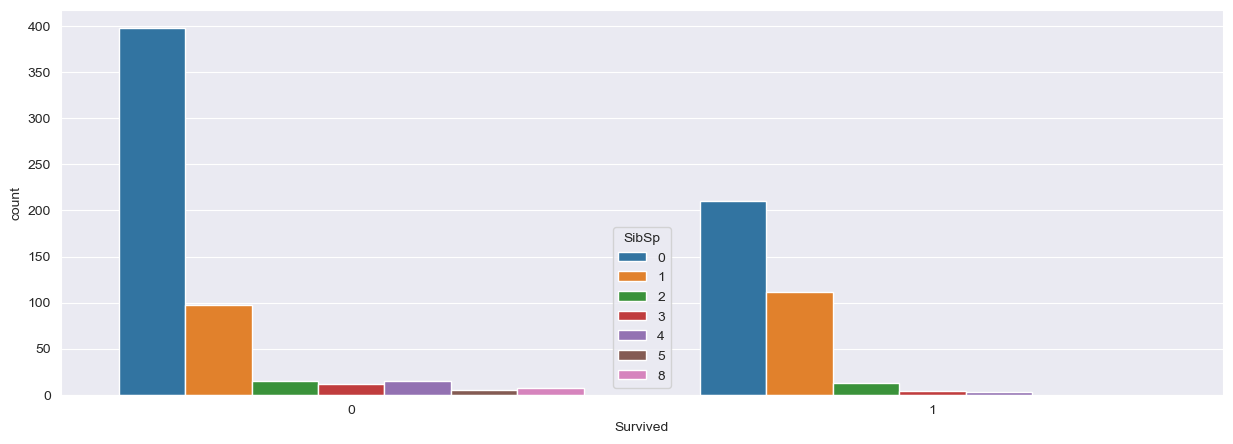

In [64]:
sns.countplot(x=titanic_data['Survived'], hue='SibSp', data=titanic_data)
plt.show()

Titanic `age` distribution

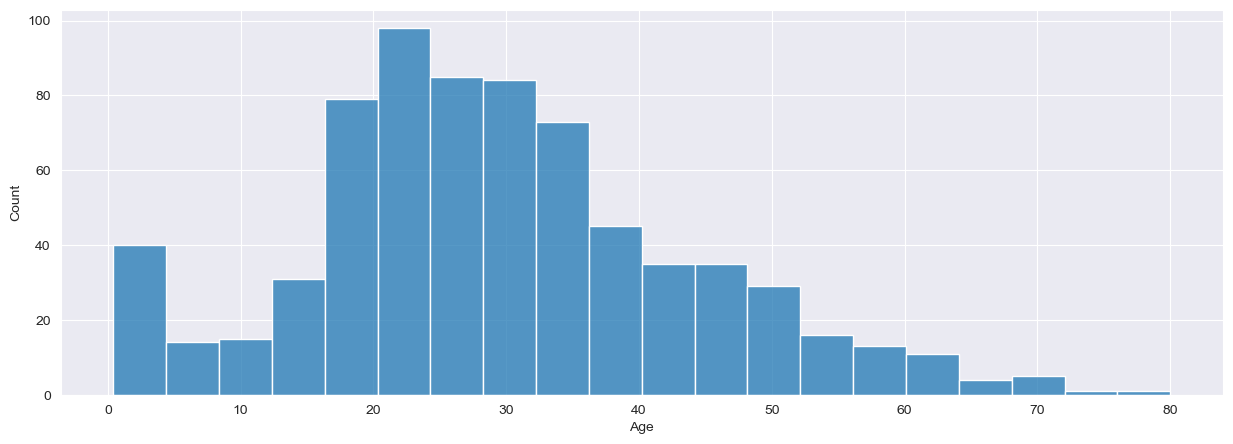

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [65]:
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()
# The average age on the Titanic seems to be ~30

The most common number of siblings one had with them on the Titanic

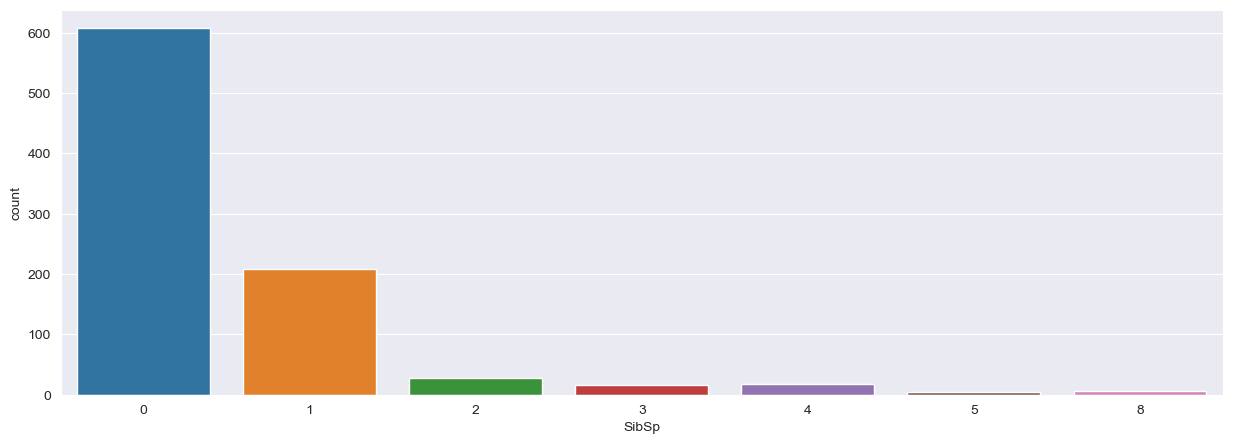

In [66]:
sns.countplot(x=titanic_data['SibSp'])
plt.show()
# Most people went alone

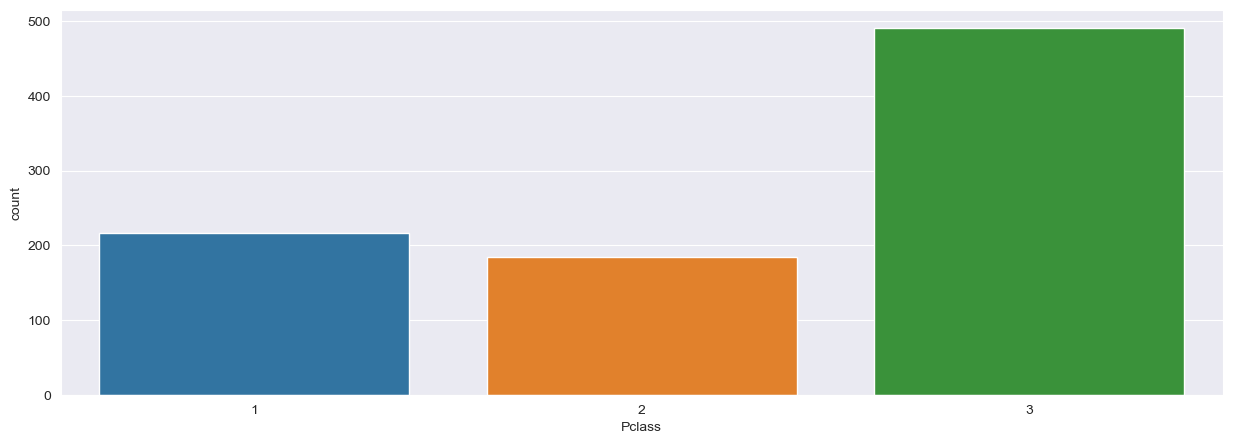

In [67]:
sns.countplot(x=titanic_data['Pclass'])
plt.show()
# We can see the social status here

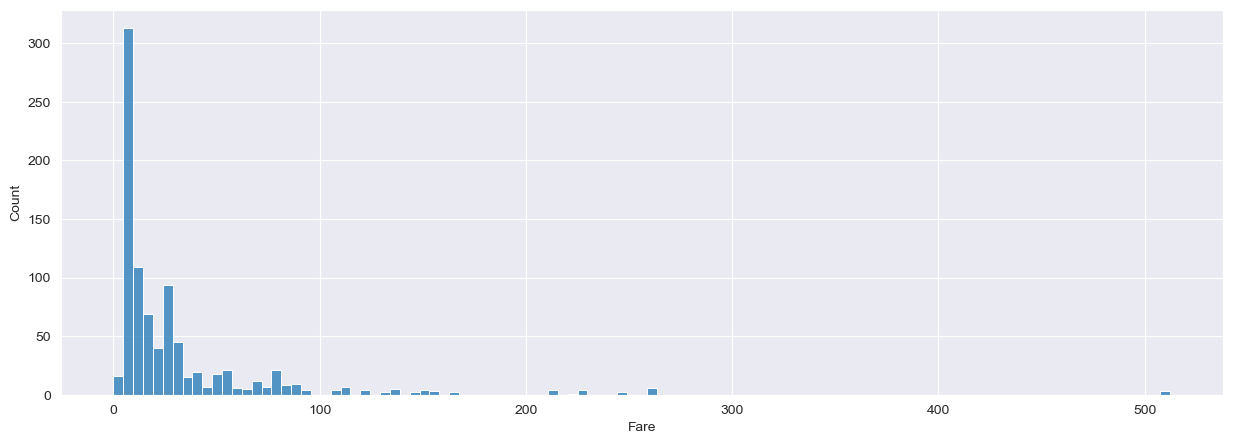

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [69]:
sns.histplot(x=titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()
# make sense after checking the countplot above

In [70]:
# A few people sneaked in for free. (or maybe got a free ride)

## Data Preprocessing

Take care of null values

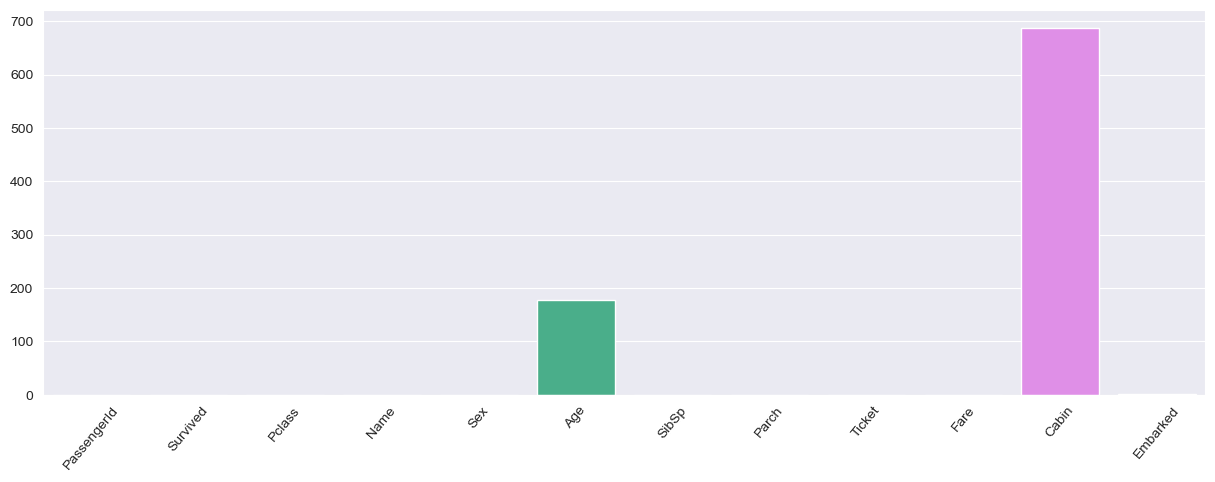

In [72]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=50)
plt.show()

Reassign missing ages with the mean age

In [73]:
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

In [77]:
print('After reassigned, the number of non-null ages is:',titanic_data['Age'].notnull().sum())

After reassigned, the number of non-null ages is: 891


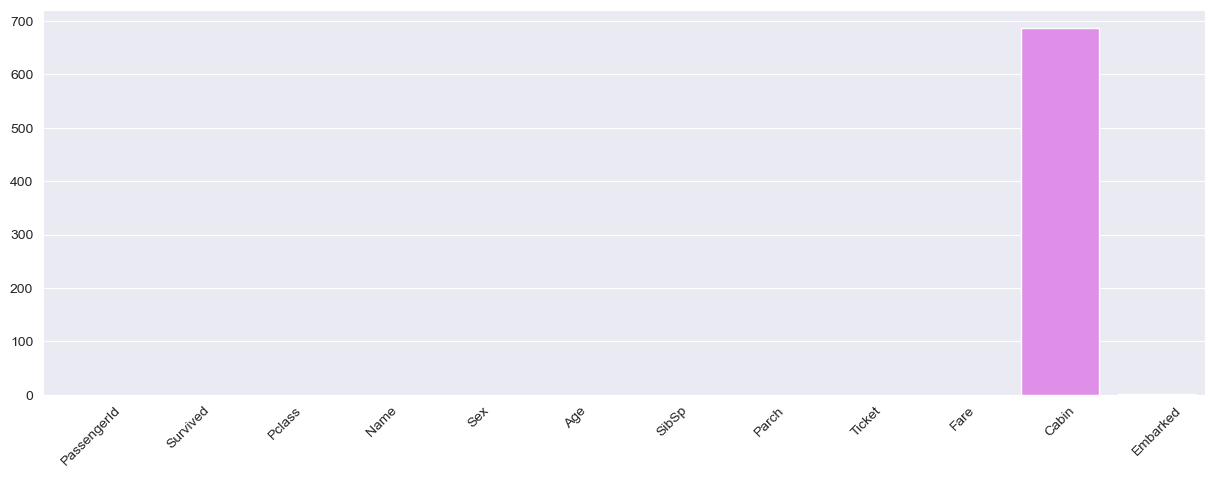

In [74]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

Check the table again to see how many non-null and null values

In [82]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Quick `barplot` to show numbers of non-null values in the table

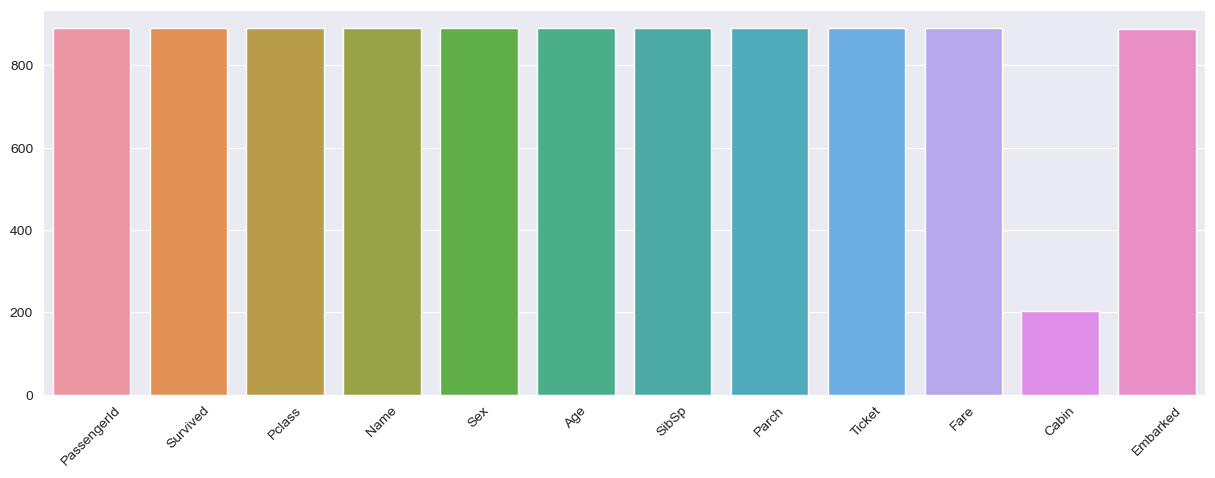

In [78]:
sns.barplot(x=titanic_data.columns, y=titanic_data.notnull().sum().values)
plt.xticks(rotation=45)
plt.show()

We can see we have more null values than non-null values in `Cabin` column, so it seems like we don't have enough data to work with. We can keep this column or maybe even drop it.

Handle categorical variables (`Name`, `Sex`, `Ticket`, `Embarked`) by using dummy variables. Dummy variables are used to indicate that whether the category is absent or present in the table.

In [83]:
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

Preview the table again after adding dummy values

In [84]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


## Creating our Logistic Regression Model

In [85]:
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Use `predict()` method with `X_train` data to make predictions of the `logmodel` with `X_train` dataset

In [98]:
train_predictions = logmodel.predict(X_train)

## Model Evaluation

Make `predictions` off of the test data and evaluate our model's `performance` using the corresponding test data labels (y_test).

In [97]:
predictions = logmodel.predict(X_test)

Import sklearn's `classification_report` and `confusion_matrix` to evaluate our model. Both of these take the true values and predictions as parameters.

In [99]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       175
           1       0.73      0.69      0.71        93

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

[[151  24]
 [ 29  64]]


Try with train dataset

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_train,train_predictions))
print(confusion_matrix(y_train,train_predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       374
           1       0.78      0.71      0.74       249

    accuracy                           0.80       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623

[[323  51]
 [ 73 176]]
